In [ ]:
# 設定資料夾
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/0609財管課程')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## 簡單的卷積範例

In [ ]:
# 簡單的卷積範例
## 執行順序如下
### 1. 建立一個矩陣作為輸入資料(把他想成圖片即可)
### 2. 再建立一個矩陣作為卷積核
### 3. 進行滑動窗口的運算
#### 3.1 滑動窗口
#### 3.2 將窗口與卷積核相乘
#### 3.3 將相乘結果相加
#### 3.4 透過相加結果，建立一個新矩陣

In [ ]:
### 1. 建立一個矩陣作為輸入資料(把他想成圖片即可)
data = [ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16] ]
data = np.array(data)
print(data)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [ ]:
### 2. 再建立一個矩陣作為卷積核
k_size = [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]
k_size = np.array(k_size)
print(k_size)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [ ]:
### 3.1 滑動窗口
for i in range(data.shape[0]-k_size.shape[0]+1):
  for j in range(data.shape[1]-k_size.shape[1]+1):
    a = data[i:i+k_size.shape[0], j:j+k_size.shape[1]]
    print('i=',i,', j=',j)
    print(a, '\n')

i= 0 , j= 0
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]] 

i= 0 , j= 1
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]] 

i= 1 , j= 0
[[ 5  6  7]
 [ 9 10 11]
 [13 14 15]] 

i= 1 , j= 1
[[ 6  7  8]
 [10 11 12]
 [14 15 16]] 



In [ ]:
### 3.2 將窗口與卷積核相乘
for i in range(data.shape[0]-k_size.shape[0]+1):
  for j in range(data.shape[1]-k_size.shape[1]+1):
    a = data[i:i+k_size.shape[0], j:j+k_size.shape[1]]
    
    # 以下是增加的部分
    product = np.multiply(k_size, a)
    print('i=',i,', j=',j)
    print(product, '\n')

i= 0 , j= 0
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]] 

i= 0 , j= 1
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]] 

i= 1 , j= 0
[[ 5  6  7]
 [ 9 10 11]
 [13 14 15]] 

i= 1 , j= 1
[[ 6  7  8]
 [10 11 12]
 [14 15 16]] 



In [ ]:
### 3.3 將相乘結果相加
for i in range(data.shape[0]-k_size.shape[0]+1):
  for j in range(data.shape[1]-k_size.shape[1]+1):
    a = data[i:i+k_size.shape[0], j:j+k_size.shape[1]]
    product = np.multiply(k_size, a)

    # 以下是增加的部分
    result = np.sum(product)
    print('i=',i,', j=',j)
    print('相加結果=', result, '\n')

i= 0 , j= 0
相加結果= 54 

i= 0 , j= 1
相加結果= 63 

i= 1 , j= 0
相加結果= 90 

i= 1 , j= 1
相加結果= 99 



In [ ]:
### 3.4 透過相加結果，建立一個新矩陣
new_matrix = []
for i in range(data.shape[0]-k_size.shape[0]+1):
  line = [] #新增一個可以儲存橫向數據的list
  for j in range(data.shape[1]-k_size.shape[1]+1):
    a = data[i:i+k_size.shape[0], j:j+k_size.shape[1]]
    product = np.multiply(k_size, a)
    result = np.sum(product)
    line.append(result) #儲存橫向的數據
  new_matrix.append(line) #儲存縱向的數據
new_matrix = np.array(new_matrix)
print('經過卷積後，產生的新矩陣')
print(new_matrix)

經過卷積後，產生的新矩陣
[[54 63]
 [90 99]]


## 拿一個真實圖片來做示範

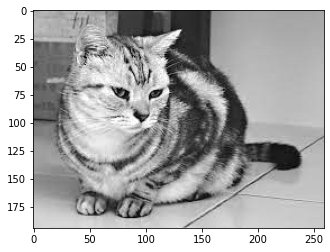

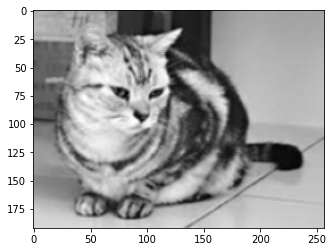

In [ ]:
# 1. 資料
data = cv2.imread('./img.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(data, cmap='gray')
plt.show()

# 2. 卷積核
# 沒有特別設定，單純對圖片取平均
k_size = [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]
# 水平邊緣檢測
#k_size = [ [1, 1, 1], [0, 0, 0], [-1, -1, -1] ]
# 垂直邊緣檢測
#k_size = [ [1, 0, -1], [1, 0, -1], [1, 0, -1] ]

k_size = np.array(k_size)

# 3. 卷積運算
new_matrix = []
for i in range(data.shape[0]-k_size.shape[0]+1):
  line = [] #新增一個可以儲存橫向數據的list
  for j in range(data.shape[1]-k_size.shape[1]+1):
    a = data[i:i+k_size.shape[0], j:j+k_size.shape[1]]
    product = np.multiply(k_size, a)
    result = np.sum(product)
    line.append(result) #儲存橫向的數據
  new_matrix.append(line) #儲存縱向的數據
new_matrix = np.array(new_matrix)
#print('經過卷積後，產生的新矩陣')
#print(new_matrix)
plt.imshow(new_matrix, cmap='gray')
plt.show()

## 池化層範例

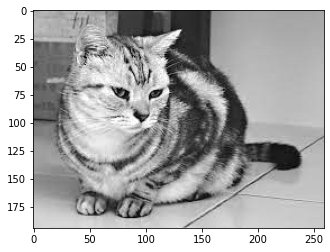

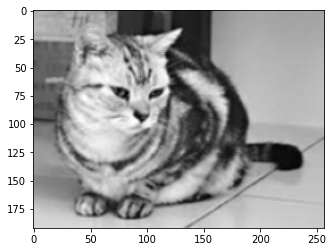

In [ ]:
# 池化層的功能，保留較重要的特徵，縮小圖片尺寸。
# 1. 資料
data = cv2.imread('./img.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(data, cmap='gray')
plt.show()

# 2. 卷積核 (會影響提取出來的影像特徵)
# 沒有特別設定，單純對圖片取平均
k_size = [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]
k_size = np.array(k_size)

# 3. 卷積運算
new_matrix = []
for i in range(data.shape[0]-k_size.shape[0]+1):
  line = [] #新增一個可以儲存橫向數據的list
  for j in range(data.shape[1]-k_size.shape[1]+1):
    a = data[i:i+k_size.shape[0], j:j+k_size.shape[1]]
    product = np.multiply(k_size, a)
    result = np.sum(product)
    line.append(result) #儲存橫向的數據
  new_matrix.append(line) #儲存縱向的數據
new_matrix = np.array(new_matrix)
#print('經過卷積後，產生的新矩陣')
#print(new_matrix)
plt.imshow(new_matrix, cmap='gray')
plt.show()

(192, 257)


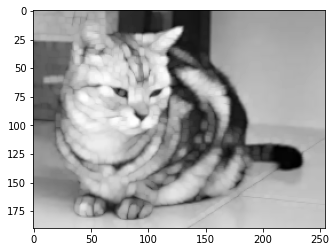

(190, 255)


In [ ]:
# 池化層範例
data = new_matrix
print(data.shape)

pool_size = 3 # 設定池化的大小
pool_matrix = []
for i in range(data.shape[0]-pool_size+1):
  line = []
  for j in range(data.shape[1]-pool_size+1):
    a = data[i:i+pool_size, j:j+pool_size]
    a = a.reshape(pool_size**2, )
    result = max(a) #我這裡只保留特徵的最大值
    line.append(result)
  pool_matrix.append(line)
pool_matrix = np.array(pool_matrix)
plt.imshow(pool_matrix, cmap='gray')
plt.show()
print(pool_matrix.shape)